# ML Models for CA Housing Prices

## Introduction
Housing prices are influenced by many different factors like income levels, population density, location, and the age of the homes in an area. Being able to predict housing values is useful for planning, real estate analysis, and understanding how different neighborhoods change over time. In this project, the goal is to use machine learning to predict the median house value of different areas in California.

The data for this project comes from the California Housing dataset. Each row represents a census block group, which is basically a small neighborhood of several hundred households. The dataset includes information such as total rooms, total bedrooms, population, number of households, median income, and the geographic coordinates of each area. It also includes categories that describe how close the area is to the ocean, since location is a major factor in housing prices.

This project starts by exploring and preparing the data, then creating new features that help capture useful patterns. After that, I trained several machine learning models to see how well they could predict the median house value. The goal is not only to find the best model but also to understand which features matter the most and how the model behaves when given new examples. By comparing different models and analyzing their results, this project shows how machine learning can be used to understand and estimate housing values across California.

The goal of this project is to build a machine learning model that can predict the median house value.

By modeling these features, the project aims to understand how factors like income, density, and proximity to the coast influence housing prices. The main objective is to compare different machine learning approaches and identify which model produces the most accurate predictions while also explaining what features matter most.

### Dataset Overview

The dataset used in this project is the California Housing dataset from the 1990 census. Each row represents a single California district, which is a small geographic area containing several hundred households. The dataset summarizes information about the houses and the people living in each district, and the goal is to predict the median house value for that district.

The dataset includes the following features:

• **longitude** and **latitude**: The geographic location of the district.  
• **housing_median_age**: The median age of the homes in the district.  
• **total_rooms** and **total_bedrooms**: The total number of rooms and bedrooms across all homes in the district.  
• **population**: The total number of people living in the district.  
• **households**: The number of household units in the district.  
• **median_income**: The median household income, measured in tens of thousands of dollars.  
• **ocean_proximity**: A categorical feature describing how close the district is to the coast.

The target variable is **median_house_value**, which represents the median value of the homes in each district. Since many of the original features are counts for the entire district, I later add features such as **rooms_per_household**, **bedrooms_per_room**, and **population_per_household** to better capture density and living conditions within each area.

This dataset provides a clear structure for exploring how location, income, and housing characteristics relate to median house values.

In [127]:
import pandas as pd
#import data
data = pd.read_csv('./housing.csv')
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploratory Data Analysis (EDA)

In [128]:
data.describe() #get summary statistics

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [129]:
data.isnull().sum() #simply check for nulls

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [130]:
data.dropna(subset=['total_bedrooms'], inplace=True)
data.isnull().sum() #to verify no more nulls in total_bedrooms


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [131]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [132]:
# One hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean')

In [133]:
data.head() # Now we can see that all of the ocean proximity columns have been one hot encoded into True/False

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [134]:
# Renaming columns for easier readability
data = data.rename(columns={'ocean_<1H OCEAN': '<1H'})
data = data.rename(columns={'ocean_NEAR BAY': 'NEAR_BAY'})
data = data.rename(columns={'ocean_ISLAND': 'ISLAND'})
data = data.rename(columns={'ocean_INLAND': 'INLAND'})
data = data.rename(columns={'ocean_NEAR OCEAN': 'NEAR_OCEAN'})

In [135]:
# Creating new columns I think will be useful for prediction later on
data["rooms_per_household"] = data["total_rooms"] / data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_household"] = data["population"] / data["households"]

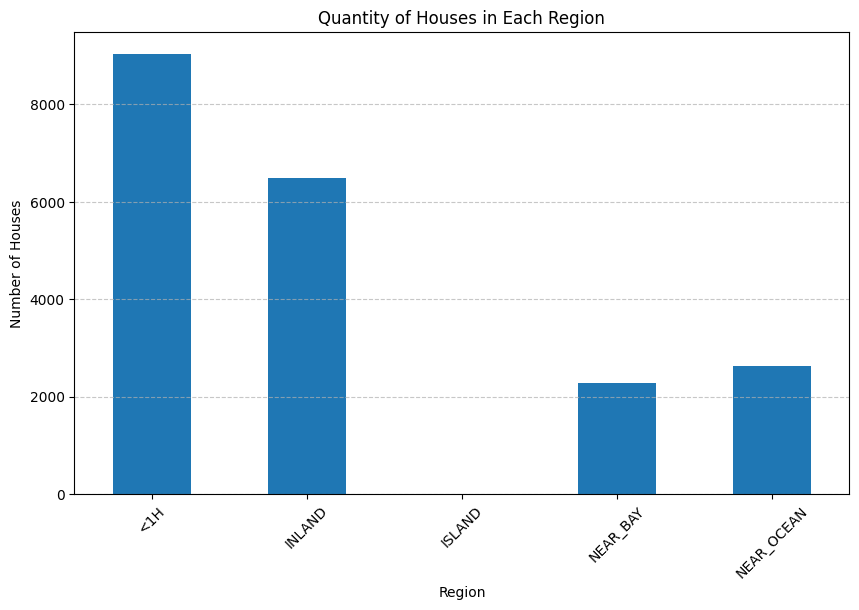

In [136]:
import matplotlib.pyplot as plt

# Summing up the counts for each region category
region_counts = data[['<1H', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']].sum()

# Plot 
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Number of Houses')
plt.title('Quantity of Houses in Each Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This chart shows how the houses in the dataset are distributed across regions.
The majority of properties are in the ‘<1H’ and ‘INLAND’ categories, while regions like ‘NEAR_BAY’ and ‘NEAR_OCEAN’ have far fewer samples.
This imbalance matters because models trained on the data may learn more from the larger regions and less from the smaller ones, which can affect overall performance and predictions for underrepresented areas

<Figure size 1000x600 with 0 Axes>

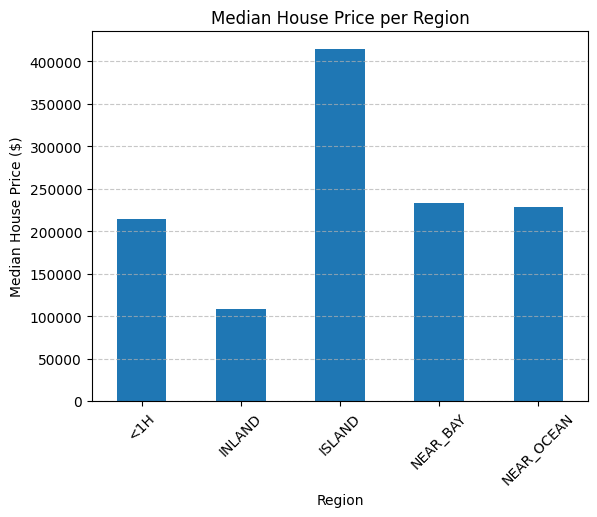

In [137]:
# Calculate the median house price for each region
median_prices = {
    region: data.loc[data[region] == 1, 'median_house_value'].median()
    for region in ['<1H', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']
}

# Convert to a DataFrame for plotting
median_prices_df = pd.DataFrame.from_dict(median_prices, orient='index', columns=['Median House Price'])

# Plot
plt.figure(figsize=(10, 6))
median_prices_df.plot(kind='bar', legend=False)
plt.xlabel('Region')
plt.ylabel('Median House Price ($)')
plt.title('Median House Price per Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This plot shows how median house prices differ across regions.
‘ISLAND’ properties have the highest median values, while ‘INLAND’ areas are the least expensive.
The coastal-related categories (<1H, NEAR_BAY, NEAR_OCEAN) fall in the middle but still show higher prices than inland areas.
This suggests that proximity to water is an important factor to include in the predictive model

Split into training and test

In [138]:
X = data.drop(columns=['median_house_value'])  # All features except target
y = data['median_house_value']  # Target variable

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [140]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (16346, 16)
Testing set size: (4087, 16)


## Model Building

### Decision Tree Model

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE: {mae_dt}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R² Score: {r2_dt}")

Decision Tree MAE: 39711.37464387276
Decision Tree MSE: 3454760739.265451
Decision Tree R² Score: 0.7216393113832028


### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [159]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 48842.023725422
Mean Squared Error (MSE): 4523208988.9474535
R² Score: 0.6355511527583222


#### Interpretation:


The Linear Regression model reached an R² score of about 0.64, which means it explains only around 64% of the variation in house prices. This lower performance is expected because the relationships in this dataset are not purely linear. Housing prices depend on nonlinear patterns like geographic location, interactions between features, and differences between regions, all of which linear regression cannot capture well. As a result, the model struggles to fit the data accurately, leading to higher error values

### Random Forest Regressor Model

In [151]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=2025)

# Train the model
rf_model.fit(X_train, y_train) 

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate 
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest MAE: 32736.59809395645
Random Forest MSE: 2486707203.658234
Random Forest R² Score: 0.7996383594003006


#### Interpretation:


The Random Forest model performed much better than Linear Regression, achieving an R² score of about 0.80. This improvement makes sense because Random Forest does not assume a linear relationship between the features and house prices. Instead, it builds many decision trees that capture nonlinear patterns, interactions, and geographic effects in the data. These properties make Random Forest a strong fit for this dataset, where house prices depend on complex relationships rather than straight-line trends.

### Using RandomizedSearchCV to tune RandomForest Model

In [155]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [10, 20, None],           
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['sqrt', 'log2', 0.5]  
}

# Initialize model
rf = RandomForestRegressor(random_state=2025)

# Perform Randomized Search
random_search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=20, scoring='r2', n_jobs=-1, random_state=2025)
random_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

# Train the best model
best_rf = random_search.best_estimator_

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}


In [156]:
# Make predictions on the test set
y_pred_best_rf = best_rf.predict(X_test)
# Evaluate the tuned Random Forest model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print results
print(f"Tuned Random Forest MAE: {mae_best_rf}")
print(f"Tuned Random Forest MSE: {mse_best_rf}")
print(f"Tuned Random Forest R² Score: {r2_best_rf}")

Tuned Random Forest MAE: 32110.376008874176
Tuned Random Forest MSE: 2331542835.8345304
Tuned Random Forest R² Score: 0.8121404293078622


#### Interpretation:


The tuned Random Forest improved performance from R² = 0.799 to R² = 0.812.
This makes sense because RandomizedSearchCV was able to find a better combination of tree depth, number of trees, and splitting rules for this dataset. The model now fits complex patterns more effectively while avoiding unnecessary splits. Although Random Forests can be tuned further, improvements beyond this point are usually small due to noise in the dataset.

### Model Comparisons

| Model                     | MAE (↓ better) | MSE (↓ better)       | R² Score (↑ better) |
|---------------------------|----------------|-----------------------|----------------------|
| Linear Regression         | 48842.02       | 4523208988.95         | 0.6356               |
| Decision Tree Regressor  | 39711.37       | 3454760739.27         | 0.7216               |
| Random Forest (Default)  | 32736.60       | 2486707203.66         | 0.7996               |
| Tuned Random Forest      | **32110.38**   | **2331542835.83**     | **0.8121**           |

In [160]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp

,feature,importance
7,median_income,0.377494
9,INLAND,0.164211
15,population_per_household,0.114394
0,longitude,0.066575
1,latitude,0.059772
14,bedrooms_per_room,0.059350
13,rooms_per_household,0.051548
2,housing_median_age,0.042379
3,total_rooms,0.013478
5,population,0.013216


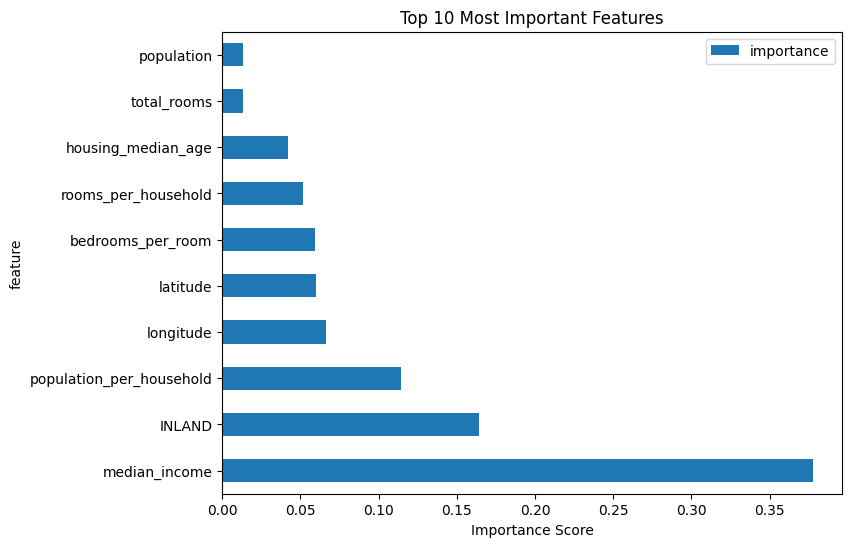

In [161]:
feat_imp.head(10).plot(kind='barh', x='feature', y='importance', figsize=(8,6))
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance Score")
plt.show()

#### Interpretation:

The feature importance results make sense for this dataset. Median income is by far the most important feature, which matches real world expectations that areas with higher income tend to have higher housing prices. This one feature alone explains a large part of the variation in the target.
The next strongest feature is INLAND, which is one of the ocean proximity categories. Houses that are far from the coast are generally cheaper, so the model learns a strong signal from this.
Population per household also ranks high, which suggests that crowded or dense areas may influence price patterns.
After those, geographic features like longitude and latitude appear. These act as simple location indicators, so the model is using them as a rough way to capture regional effects even though we did not explicitly engineer location clusters.
Features related to room counts (rooms per household, bedrooms per room, etc.) have moderate importance but they matter much less than income or location. Basic count features like total rooms or total bedrooms are among the least important.
Finally, the other ocean-proximity dummy variables (NEAR_OCEAN, NEAR_BAY, ISLAND) show extremely low importance. This is probably because their categories are small or overlap with patterns already captured by latitude/longitude.
Overall, the plot confirms that income + location are the main drivers of house prices, while the room/bedroom counts only add small improvements.

### Testing the Model on Realistic Neighborhood Scenarios


In [166]:
def predict_house_price(model, input_dict):

    df = pd.DataFrame([input_dict])
    return model.predict(df)[0]

In [ ]:
cheap_neighborhood = {
    'longitude': -121.50,
    'latitude': 38.00,
    'housing_median_age': 45,
    'total_rooms': 1800,
    'total_bedrooms': 450,
    'population': 1600,
    'households': 500,
    'median_income': 2.0,  # ~ $20,000
    '<1H': 0,
    'INLAND': 1,
    'ISLAND': 0,
    'NEAR_BAY': 0,
    'NEAR_OCEAN': 0,
    'rooms_per_household': 1800/500,
    'bedrooms_per_room': 450/1800,
    'population_per_household': 1600/500
}

middle_neighborhood = {
    'longitude': -122.25,
    'latitude': 37.85,
    'housing_median_age': 30,
    'total_rooms': 3000,
    'total_bedrooms': 600,
    'population': 1400,
    'households': 450,
    'median_income': 4.0,  # ~ $40,000
    '<1H': 0,
    'INLAND': 0,
    'ISLAND': 0,
    'NEAR_BAY': 1,
    'NEAR_OCEAN': 0,
    'rooms_per_household': 3000/450,
    'bedrooms_per_room': 600/3000,
    'population_per_household': 1400/450
}

expensive_neighborhood = {
    'longitude': -118.40,
    'latitude': 34.00,
    'housing_median_age': 15,
    'total_rooms': 4500,
    'total_bedrooms': 850,
    'population': 900,
    'households': 300,
    'median_income': 7.0,  # ~ $70,000
    '<1H': 0,
    'INLAND': 0,
    'ISLAND': 0,
    'NEAR_BAY': 0,
    'NEAR_OCEAN': 1,
    'rooms_per_household': 4500/300,
    'bedrooms_per_room': 850/4500,
    'population_per_household': 900/300
}

print("Cheap:", predict_house_price(best_rf, cheap_neighborhood))
print("Middle:", predict_house_price(best_rf, middle_neighborhood))
print("Expensive:", predict_house_price(best_rf, expensive_neighborhood))

## Neighborhood Prediction Interpretation:

I tested the tuned Random Forest model on three example neighborhoods. One was a cheap inland area with low income, one was a middle income area near the bay, and one was a more expensive coastal area.

#### Predicted Median House Values

| Neighborhood Type | Predicted Value |
|-------------------|-----------------|
| Cheap Area        | \$78,254        |
| Middle Area       | \$209,554       |
| Expensive Area    | \$413,688       |

These predictions look normal for this dataset. The cheap neighborhood has low income, a lot of people living in the same area, and is located inland, so a low predicted price makes sense. The middle income example has a decent income level and is close to the bay which usually raises housing values. The predicted value ends up in the middle range of the dataset. The expensive example has high income, newer homes, lower density, and is near the ocean. That is why the model gives it a much higher value.

The predictions move the way they should when the important features change. When income and location improve, the predicted value increases. When they are worse, the predicted value drops. This shows that the tuned Random Forest is learning reasonable relationships from the data.

## Conclusion

In this project I built several models to predict the median house value for California census block groups. I started with linear regression and then moved to more flexible models like decision trees and random forests. The linear regression model did not perform very well because the relationships in this dataset are not strictly linear. The decision tree improved the accuracy but it also overfit the data.

The random forest model performed much better because it can capture non-linear patterns and combine many trees to reduce overfitting. After tuning the hyperparameters with RandomizedSearchCV, the tuned random forest became the best model. It reached an R² of about 0.81 and had the lowest errors out of all the models. This means the model was able to explain most of the variation in house values using the features in the dataset.

The feature importance results also made sense. Median income was the strongest predictor, followed by location-related features and the engineered ratios like rooms per household. This matches real-world expectations, since income and location are major factors in housing prices.

Overall, the tuned random forest gave accurate and reasonable predictions, and it reacted in the expected way when testing it on example neighborhoods. The project shows how different models behave on the same dataset and how tuning and feature engineering can lead to a noticeable improvement in performance.